# Logistic regression for a 2D classification problem

Imports...

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

## Load and visualize data

In [20]:
data = pd.read_csv("2d-classification-data.csv")
data.head(10)

,x1,x2,y,z1,z2
0,0.689081,-0.273955,0,0.474833,0.075051
1,-0.972862,-1.960965,1,0.946460,3.845385
2,0.129132,-0.882432,0,0.016675,0.778686
3,1.625773,-0.429262,1,2.643138,0.184266
4,-1.900579,0.685747,1,3.612201,0.470249
5,1.348683,1.885999,1,1.818945,3.556991
6,-1.772268,-0.198705,1,3.140935,0.039484
7,0.329881,0.746551,0,0.108822,0.557339
8,0.600163,0.907658,1,0.360196,0.823843
9,-0.504609,0.326328,0,0.254631,0.106490


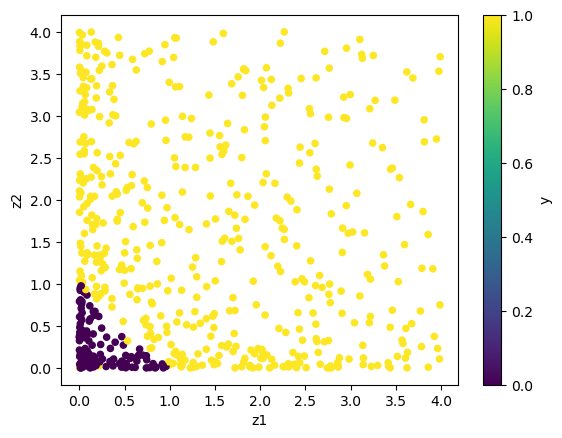

In [21]:
data.plot.scatter(x="z1", y="z2", c="y", cmap="viridis");

## Define and fit the model

In [22]:
# Select model input variables
X = data[["z1", "z2"]].copy()
X

,z1,z2
0,0.474833,0.075051
1,0.946460,3.845385
2,0.016675,0.778686
3,2.643138,0.184266
4,3.612201,0.470249
...,...,...
595,0.912585,2.054487
596,0.061714,0.358177
597,0.122230,2.007258
598,2.628686,0.314471


In [23]:
# Define a model and fit it
# Note: sklearn.linear_model.LogisticRegression adds an intercept automatically.
model = LogisticRegression(penalty=None)
model.fit(X, data["y"])

LogisticRegression()

In [24]:
# Parameters
beta_1, beta_2 = model.coef_[0]
beta_0 = model.intercept_.item()
print(beta_0, beta_1, beta_2)

-4.151787261851684 4.352477673386316 4.152434760852718


In [25]:
# Alternative: statsmodels
model_sm = sm.Logit(data["y"], sm.add_constant(X))
results = model_sm.fit()
print(results.summary())

# beta_0, beta_1, beta_2 = results.params
# print(beta_0, beta_1, beta_2)

Optimization terminated successfully.
         Current function value: 0.065198
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  600
Model:                          Logit   Df Residuals:                      597
Method:                           MLE   Df Model:                            2
Date:                Tue, 29 Oct 2024   Pseudo R-squ.:                  0.8679
Time:                        17:44:43   Log-Likelihood:                -39.119
converged:                       True   LL-Null:                       -296.04
Covariance Type:            nonrobust   LLR p-value:                2.646e-112
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.3198      1.686     -6.120      0.000     -13.625      -7.015
z1            10.6802      1

## Use model for Prediction

In [26]:
# Prediction of training samples
data['prediction'] = model.predict(X)
data['probability'] = model.predict_proba(X)[:,1]

In [27]:
# Alternative: statsmodels
data['prediction_sm'] = (model_sm.predict(results.params) > 0.5) * 1.0
data['probability_sm'] = model_sm.predict(results.params)

## Visualization

C:\Users\metea\AppData\Local\Temp\ipykernel_27256\240575655.py:4: RuntimeWarning: invalid value encountered in sqrt
  x2 = +np.sqrt((-x1*x1 * beta_1 - beta_0) / beta_2)
C:\Users\metea\AppData\Local\Temp\ipykernel_27256\240575655.py:6: RuntimeWarning: invalid value encountered in sqrt
  x2 = -np.sqrt((-x1*x1 * beta_1 - beta_0) / beta_2)


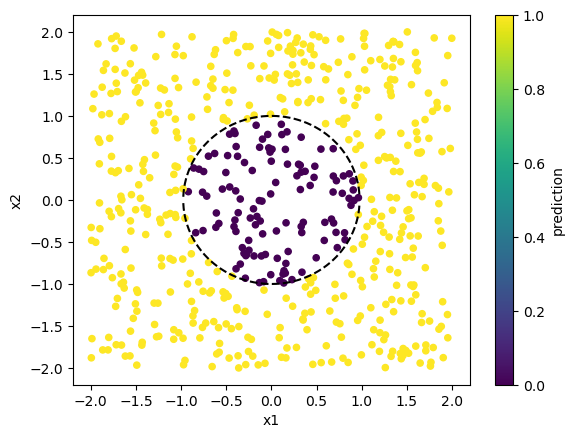

In [28]:
# Predictions with decision boundary
data.plot.scatter(x="x1", y="x2", c="prediction", cmap="viridis");
x1 = np.linspace(-1, 1, 1000)
x2 = +np.sqrt((-x1*x1 * beta_1 - beta_0) / beta_2)
plt.plot(x1, x2, c="black", linestyle="--");
x2 = -np.sqrt((-x1*x1 * beta_1 - beta_0) / beta_2)
plt.plot(x1, x2, c="black", linestyle="--");

C:\Users\metea\AppData\Local\Temp\ipykernel_27256\4293502514.py:4: RuntimeWarning: invalid value encountered in sqrt
  x2 = +np.sqrt((-x1*x1 * beta_1 - beta_0) / beta_2)
C:\Users\metea\AppData\Local\Temp\ipykernel_27256\4293502514.py:6: RuntimeWarning: invalid value encountered in sqrt
  x2 = -np.sqrt((-x1*x1 * beta_1 - beta_0) / beta_2)


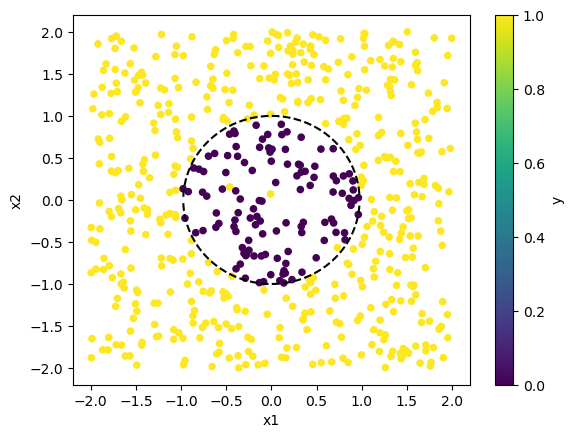

In [29]:
# Decision boundary vs. ground truth
data.plot.scatter(x="x1", y="x2", c="y", cmap="viridis");
x1 = np.linspace(-1, 1, 1000)
x2 = +np.sqrt((-x1*x1 * beta_1 - beta_0) / beta_2)
plt.plot(x1, x2, c="black", linestyle="--");
x2 = -np.sqrt((-x1*x1 * beta_1 - beta_0) / beta_2)
plt.plot(x1, x2, c="black", linestyle="--");

C:\Users\metea\AppData\Local\Temp\ipykernel_27256\386591149.py:4: RuntimeWarning: invalid value encountered in sqrt
  x2 = +np.sqrt((-x1*x1 * beta_1 - beta_0) / beta_2)
C:\Users\metea\AppData\Local\Temp\ipykernel_27256\386591149.py:6: RuntimeWarning: invalid value encountered in sqrt
  x2 = -np.sqrt((-x1*x1 * beta_1 - beta_0) / beta_2)


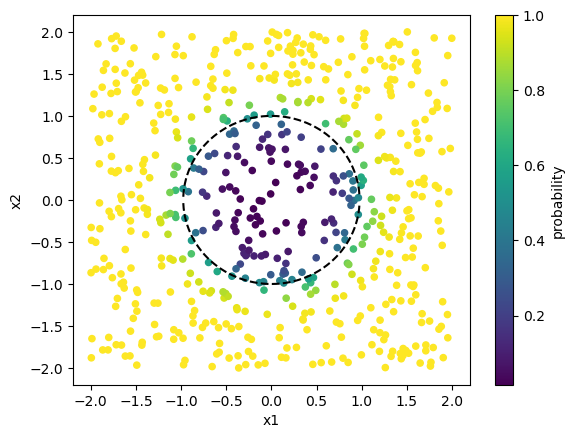

In [30]:
# Probabilities
data.plot.scatter(x="x1", y="x2", c="probability", cmap="viridis");
x1 = np.linspace(-1, 1, 1000)
x2 = +np.sqrt((-x1*x1 * beta_1 - beta_0) / beta_2)
plt.plot(x1, x2, c="black", linestyle="--");
x2 = -np.sqrt((-x1*x1 * beta_1 - beta_0) / beta_2)
plt.plot(x1, x2, c="black", linestyle="--");